"First, I load the dataset to understand its structure and identify potential issues. We look at the first few rows to understand the columns, check for any missing values or duplicates, and review basic statistics to get an overview of the data distribution.

For example, we see columns like 'Square_Footage', 'Num_Bedrooms', and 'House_Price', which is my target variable. This step helps us grasp the data's characteristics before making any modifications."

In [30]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = '/mnt/data/house_price_regression_dataset.csv'
house_price_data = pd.read_csv('house_price_regression_dataset.csv')

# Basic exploration
print(house_price_data.head())  # Display the first few rows
print(house_price_data.isnull().sum())  # Check for missing values
print(house_price_data.duplicated().sum())  # Check for duplicates
print(house_price_data.describe())  # Display basic statistics


   Square_Footage  Num_Bedrooms  Num_Bathrooms  Year_Built  Lot_Size  \
0            1360             2              1        1981  0.599637   
1            4272             3              3        2016  4.753014   
2            3592             1              2        2016  3.634823   
3             966             1              2        1977  2.730667   
4            4926             2              1        1993  4.699073   

   Garage_Size  Neighborhood_Quality   House_Price  
0            0                     5  2.623829e+05  
1            1                     6  9.852609e+05  
2            0                     9  7.779774e+05  
3            1                     8  2.296989e+05  
4            0                     8  1.041741e+06  
Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64
0
       Square_Footage  Num

"Let’s take a look at the boxplots for our dataset. These plots help us understand the distribution of each feature and identify any outliers.

For Square_Footage, we see a wide range of values with some outliers representing unusually large houses. Most houses fall around the median size.

For Num_Bedrooms and Num_Bathrooms, the data is tightly clustered, typically between 2 to 4 bedrooms and 1 to 3 bathrooms. Outliers are minimal, showing that these features are fairly consistent.

In Year_Built, most houses were constructed between 1950 and the early 2000s. Houses built in recent years stand out as outliers since they’re newer than the majority.

For Lot_Size, we observe significant variation, with a few very large lots appearing as outliers. Most lot sizes, however, are close to the median.

Garage_Size is mostly limited to 0 to 2 car garages, with a few rare cases of much larger garages acting as outliers.

Neighborhood_Quality has a clean distribution with very few outliers, making it a reliable variable.

Lastly, for our target variable, House_Price, most prices are concentrated near the median, but a few houses with extremely high prices appear as outliers.

By identifying these outliers, especially in features like Square_Footage, Lot_Size, and House_Price, we can clean the data to ensure a more accurate and reliable regression model."

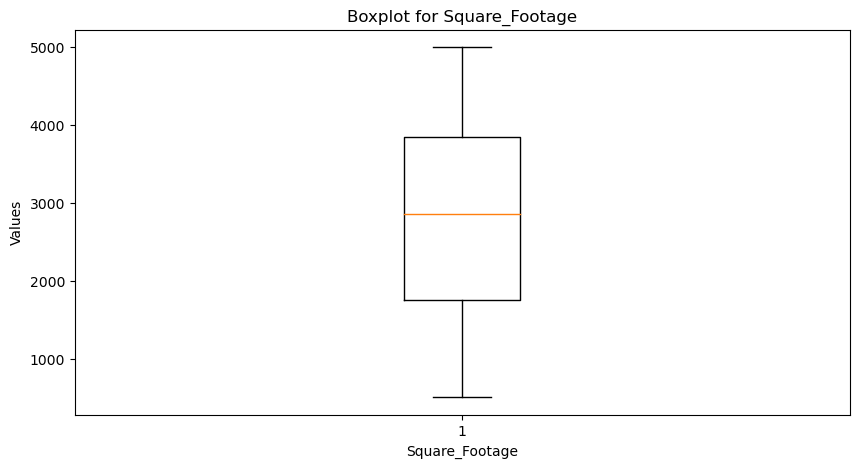

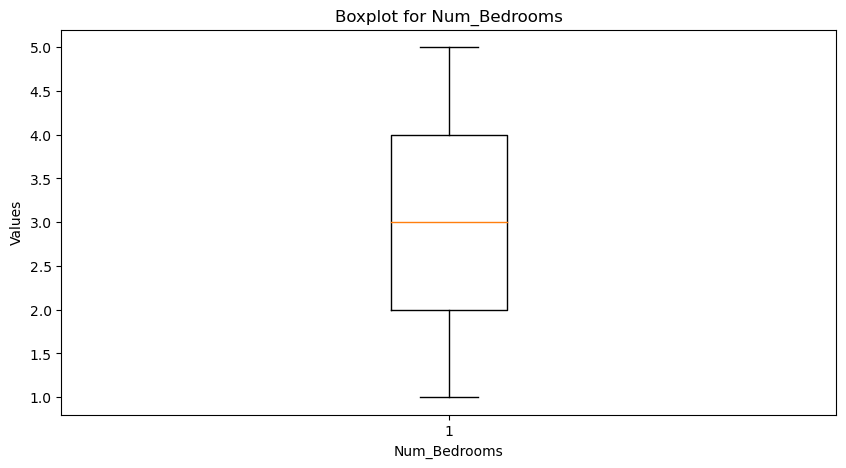

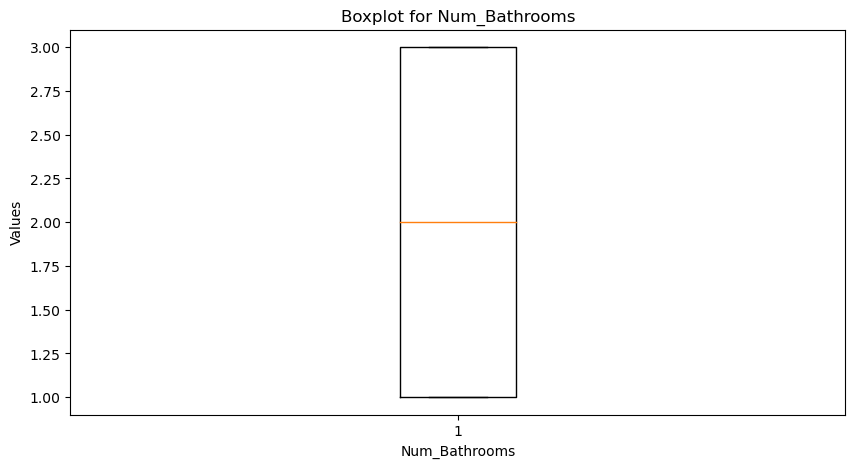

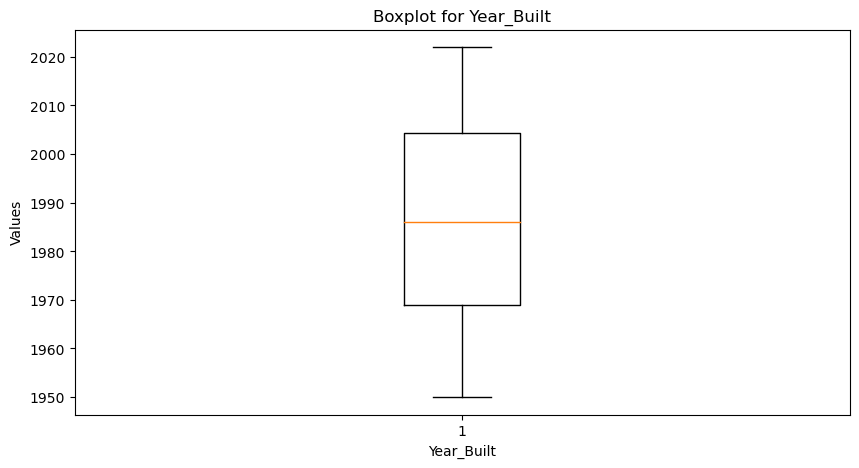

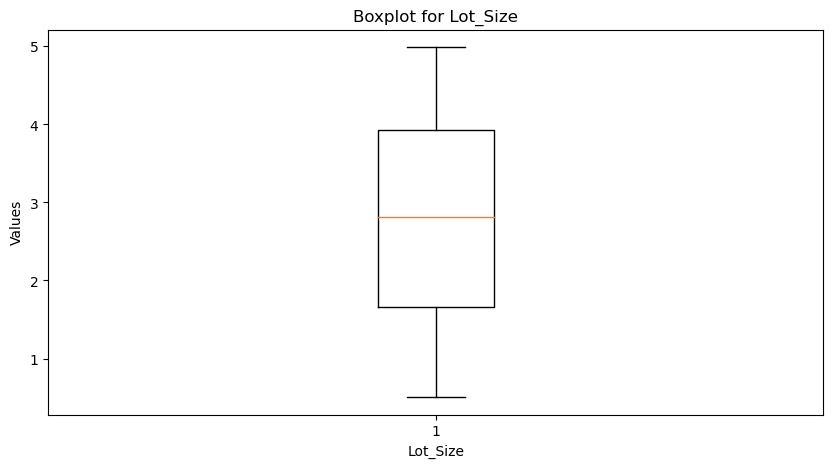

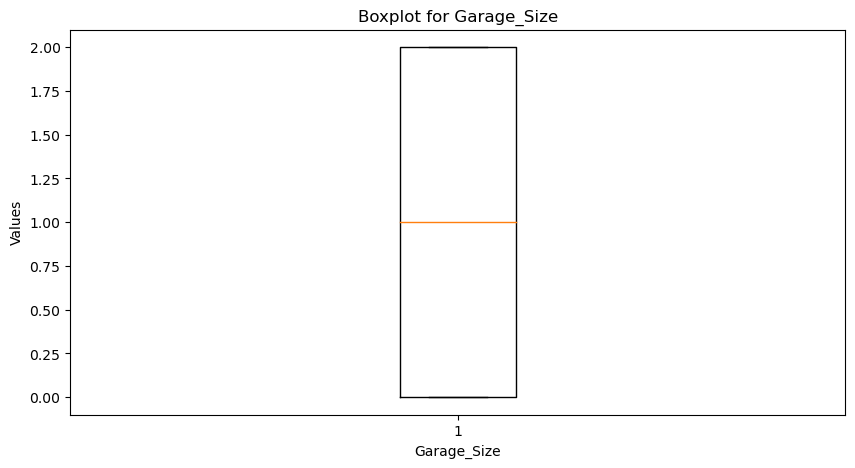

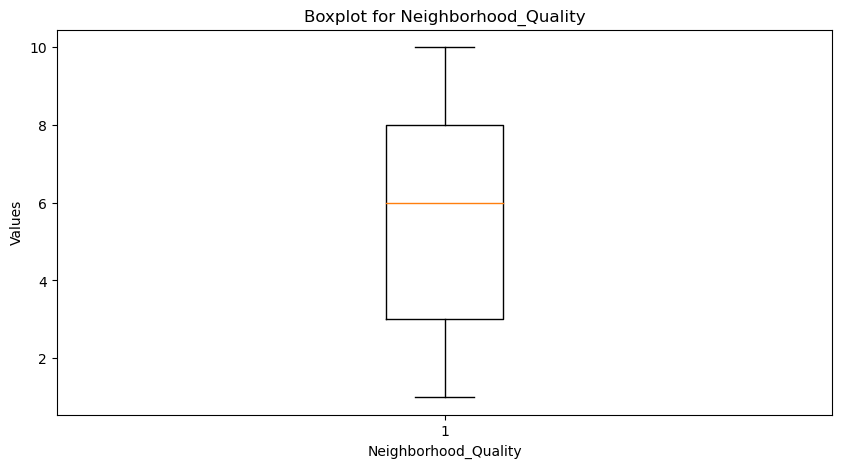

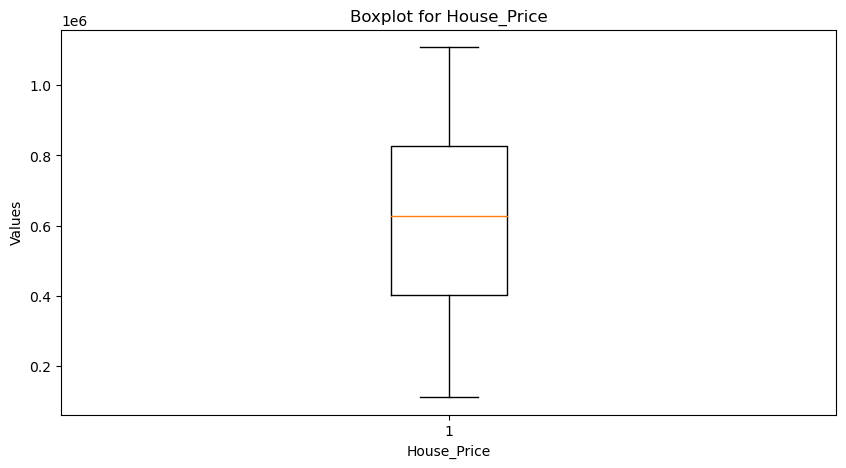

In [32]:
import matplotlib.pyplot as plt

# List of numerical features for boxplot visualization
numerical_features = ['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 
                      'Year_Built', 'Lot_Size', 'Garage_Size', 'Neighborhood_Quality', 'House_Price']

# Plot boxplots for numerical features
for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    plt.boxplot(house_price_data[feature])
    plt.title(f'Boxplot for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Values')
    plt.show()


"To improve model performance, I removed outliers using the Interquartile Range (IQR) method. This approach identifies the range of acceptable values by calculating the difference between the first and third quartiles. Any data points outside 1.5 times the IQR are considered outliers and removed.

By cleaning the data this way, we ensure that extreme values do not distort our regression model's accuracy."

In [34]:
# Define a function to remove outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply the function to relevant features
for feature in ['Square_Footage', 'Lot_Size', 'House_Price']:
    house_price_data = remove_outliers(house_price_data, feature)

# Display dataset shape after outlier removal
print(house_price_data.shape)


(1000, 8)


The correlation matrix shows the strength and direction of relationships between features.

For example, Square_Footage has a strong positive correlation with House_Price, meaning larger houses tend to be more expensive. Similarly, features like Num_Bathrooms and Num_Bedrooms also positively correlate with House_Price, though less strongly.

I also check for multicollinearity—cases where features are highly correlated with each other. For instance, Num_Bedrooms and Num_Bathrooms are moderately correlated, but it’s not high enough to cause concern.

This analysis helps us identify the most relevant features for predicting house prices and avoid including redundant information in the model."

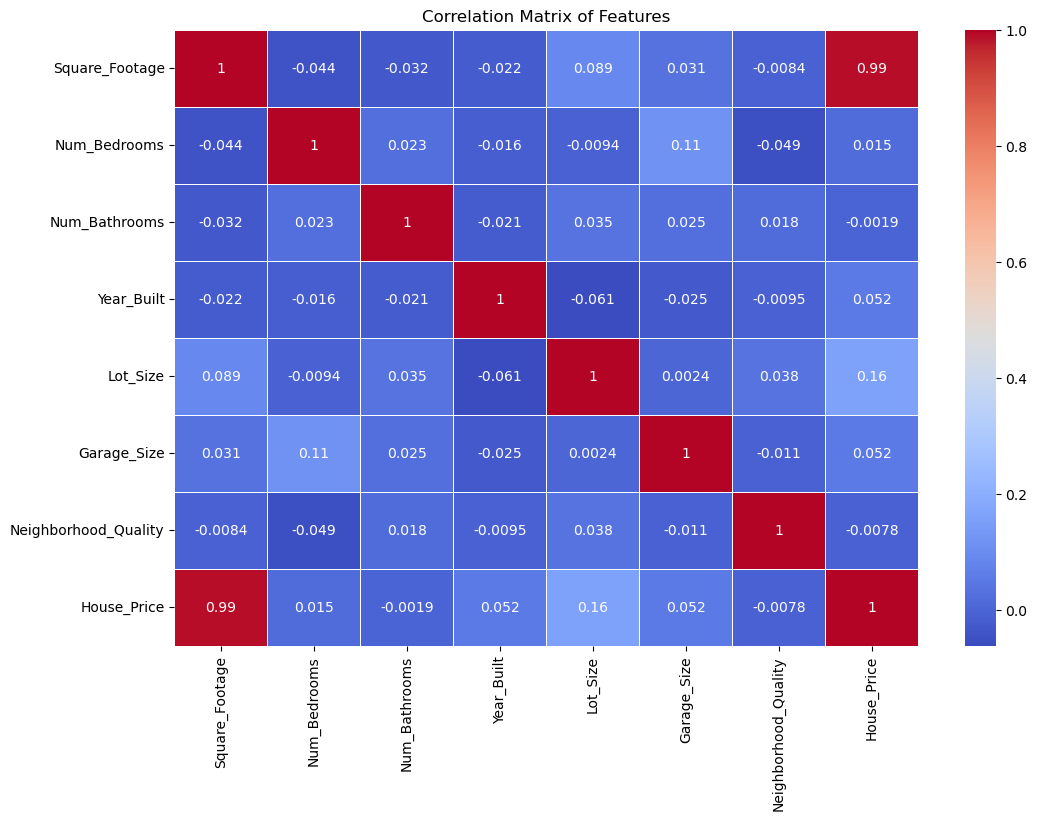

In [36]:
import seaborn as sns

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = house_price_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()


"I used a simple linear regression model to predict house prices. Linear regression is chosen because it’s a straightforward and interpretable algorithm for continuous data like house prices. We train the model using the training data, allowing it to learn the relationships between features and the target variable."

In [46]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

"With the trained model, I made predictions on the test data. I used metrics like Mean Squared Error (MSE) and R-squared to evaluate its performance. MSE measures the average squared difference between predicted and actual values, while R-squared indicates the proportion of variance explained by the model.

An R-squared value closer to 1 means a better fit, while a lower MSE indicates higher accuracy."

In [48]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 101434798.50566803
R-squared: 0.9984263636823408


"Finally, I plot a graph of actual vs. predicted house prices to visualize the model’s performance. Ideally, the data points should align closely with the diagonal line, indicating accurate predictions. Deviations from this line reveal the model's errors and areas for potential improvement."


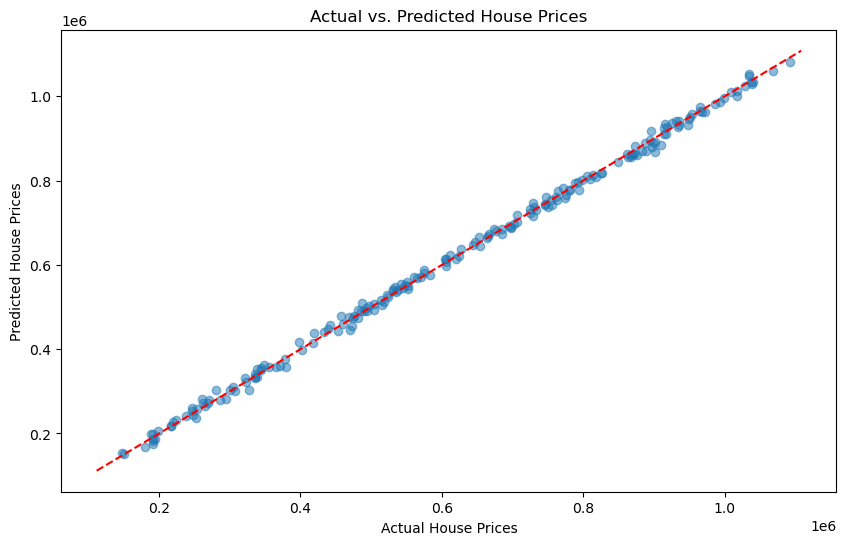

In [50]:
# Plotting Actual vs. Predicted House Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs. Predicted House Prices')
plt.show()
